In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sns.set()

# Column 2 -> Throughput
# Column 4 -> Latency

In [34]:
# WORKLOAD A
mean_data = []
median_data = []
std_data = []
for i in [10,20,30,40,50,60,70,80,100,120]:
    df = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloada_couchbase_custom/results-' + str(i) + '.csv', sep = ';', header=None)
    df_val1 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloada_couchbase_custom-validation/results-' + str(i) + '.csv', sep = ';', header=None)
    df_val2 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloada_couchbase_custom-validation2/results-' + str(i) + '.csv', sep = ';', header=None)

    means = (df.groupby(3).mean() + df_val1.groupby(3).mean() + df_val2.groupby(3).mean()) / 3
    means = means.drop(index='CLEANUP')
    throughput_weighted_average = ([0.5, 0.5] * means[2].values).sum()
    latency_weighted_average = ([0.5, 0.5] * means[4].values).sum()
    mean_data.append([i, throughput_weighted_average, latency_weighted_average])
    
    medians = (df.groupby(3).median() + df_val1.groupby(3).median() + df_val2.groupby(3).median()) / 3
    medians = medians.drop(index='CLEANUP')
    throughput_weighted_average = ([0.5, 0.5] * medians[2].values).sum()
    latency_weighted_average = ([0.5, 0.5] * medians[4].values).sum()
    median_data.append([i, throughput_weighted_average, latency_weighted_average])
    
    stds = (df.groupby(3).std() + df_val1.groupby(3).std() + df_val2.groupby(3).std()) / 3
    stds = stds.drop(index='CLEANUP')
    throughput_weighted_average = ([0.5, 0.5] * stds[2].values).sum()
    latency_weighted_average = ([0.5, 0.5] * stds[4].values).sum()
    std_data.append([i, throughput_weighted_average, latency_weighted_average])

,Threads,Throughput,Latency
0,10,1441.286119,8746.151229
1,20,1826.793873,15477.730392
2,30,2010.754309,34281.846100
3,40,2069.885444,28524.215650
4,50,2193.291431,33550.989397
5,60,2252.461147,50036.024120
6,70,2512.775124,41735.873242
7,80,2373.638096,79843.572039
8,100,2662.923956,73227.463326
9,120,2769.515964,82229.781772


\begin{tabular}{rrr}
\toprule
 Threads &  Throughput &  Latency \\
\midrule
      10 &     1441.29 &  8746.15 \\
      20 &     1826.79 & 15477.73 \\
      30 &     2010.75 & 34281.85 \\
      40 &     2069.89 & 28524.22 \\
      50 &     2193.29 & 33550.99 \\
      60 &     2252.46 & 50036.02 \\
      70 &     2512.78 & 41735.87 \\
      80 &     2373.64 & 79843.57 \\
     100 &     2662.92 & 73227.46 \\
     120 &     2769.52 & 82229.78 \\
\bottomrule
\end{tabular}



,Threads,Throughput,Latency
0,10,1472.161667,6070.723333
1,20,1863.545000,9220.191667
2,30,2105.970584,12541.727210
3,40,2209.691667,15583.394167
4,50,2313.896667,17858.210833
5,60,2415.916667,21664.580833
6,70,2680.463333,23205.820833
7,80,2443.706667,27217.255833
8,100,2738.520000,32333.910000
9,120,2950.026667,35158.571667


\begin{tabular}{rrr}
\toprule
 Threads &  Throughput &  Latency \\
\midrule
      10 &     1472.16 &  6070.72 \\
      20 &     1863.55 &  9220.19 \\
      30 &     2105.97 & 12541.73 \\
      40 &     2209.69 & 15583.39 \\
      50 &     2313.90 & 17858.21 \\
      60 &     2415.92 & 21664.58 \\
      70 &     2680.46 & 23205.82 \\
      80 &     2443.71 & 27217.26 \\
     100 &     2738.52 & 32333.91 \\
     120 &     2950.03 & 35158.57 \\
\bottomrule
\end{tabular}



,Threads,Throughput,Latency
0,10,404.163517,22216.166947
1,20,541.884734,45630.776320
2,30,589.604169,149113.303081
3,40,709.833212,81208.614672
4,50,672.527941,98066.102118
5,60,682.192260,176878.919241
6,70,685.156553,120139.917090
7,80,781.221052,302346.903480
8,100,758.171740,253396.893806
9,120,950.172744,277792.103405


\begin{tabular}{rrr}
\toprule
 Threads &  Throughput &   Latency \\
\midrule
      10 &      404.16 &  22216.17 \\
      20 &      541.88 &  45630.78 \\
      30 &      589.60 & 149113.30 \\
      40 &      709.83 &  81208.61 \\
      50 &      672.53 &  98066.10 \\
      60 &      682.19 & 176878.92 \\
      70 &      685.16 & 120139.92 \\
      80 &      781.22 & 302346.90 \\
     100 &      758.17 & 253396.89 \\
     120 &      950.17 & 277792.10 \\
\bottomrule
\end{tabular}



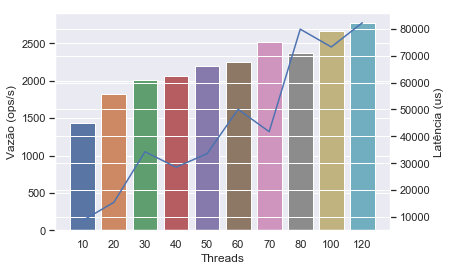

In [35]:
# Geração de gráfico

mean_df = pd.DataFrame(mean_data, columns = ['Threads', 'Throughput', 'Latency']) 
median_df = pd.DataFrame(median_data, columns = ['Threads', 'Throughput', 'Latency']) 
std_df = pd.DataFrame(std_data, columns = ['Threads', 'Throughput', 'Latency']) 
display(mean_df)
print(mean_df.to_latex(index=False, float_format="%.2f"))
display(median_df)
print(median_df.to_latex(index=False, float_format="%.2f"))
display(std_df)
print(std_df.to_latex(index=False, float_format="%.2f"))
ax = sns.barplot(x="Threads", y="Throughput", data=mean_df)
ax.set(xlabel='Threads', ylabel='Vazão (ops/s)')
ax2 = plt.twinx()
ax2.set(ylabel="Latência (us)")
fig = sns.lineplot(data=mean_df.Latency, ax=ax2)

In [40]:
# WORKLOAD B
mean_data = []
median_data = []
std_data = []
for i in [10,20,30,40,50,60,70,80,100,120]:
    df = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadb_couchbase_custom/results-' + str(i) + '.csv', sep = ';', header=None)
    df_val1 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadb_couchbase_custom-validation/results-' + str(i) + '.csv', sep = ';', header=None)
    df_val2 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadb_couchbase_custom-validation2/results-' + str(i) + '.csv', sep = ';', header=None)

    means = (df.groupby(3).mean() + df_val1.groupby(3).mean() + df_val2.groupby(3).mean()) / 3
    means = means.drop(index='CLEANUP')
    throughput_weighted_average = ([0.95, 0.05] * means[2].values).sum()
    latency_weighted_average = ([0.95, 0.05] * means[4].values).sum()
    mean_data.append([i, throughput_weighted_average, latency_weighted_average])
    
    medians = (df.groupby(3).median() + df_val1.groupby(3).median() + df_val2.groupby(3).median()) / 3
    medians = medians.drop(index='CLEANUP')
    throughput_weighted_average = ([0.95, 0.05] * medians[2].values).sum()
    latency_weighted_average = ([0.95, 0.05] * medians[4].values).sum()
    median_data.append([i, throughput_weighted_average, latency_weighted_average])
    
    stds = (df.groupby(3).std() + df_val1.groupby(3).std() + df_val2.groupby(3).std()) / 3
    stds = stds.drop(index='CLEANUP')
    throughput_weighted_average = ([0.95, 0.05] * stds[2].values).sum()
    latency_weighted_average = ([0.95, 0.05] * stds[4].values).sum()
    std_data.append([i, throughput_weighted_average, latency_weighted_average])

,Threads,Throughput,Latency
0,10,3757.390401,2919.970289
1,20,4769.044406,19546.645367
2,30,4574.382151,25029.673628
3,40,5707.831383,17308.327937
4,50,5986.907573,10580.088840
5,60,5925.163439,40794.435523
6,70,7093.788373,58259.404683
7,80,6552.424396,115381.784464
8,100,7097.445163,83910.454613
9,120,7090.122151,134275.346782


\begin{tabular}{rrr}
\toprule
 Threads &  Throughput &   Latency \\
\midrule
      10 &     3757.39 &   2919.97 \\
      20 &     4769.04 &  19546.65 \\
      30 &     4574.38 &  25029.67 \\
      40 &     5707.83 &  17308.33 \\
      50 &     5986.91 &  10580.09 \\
      60 &     5925.16 &  40794.44 \\
      70 &     7093.79 &  58259.40 \\
      80 &     6552.42 & 115381.78 \\
     100 &     7097.45 &  83910.45 \\
     120 &     7090.12 & 134275.35 \\
\bottomrule
\end{tabular}



,Threads,Throughput,Latency
0,10,3864.220000,2431.122833
1,20,5090.983333,3559.409167
2,30,5135.400167,5201.222917
3,40,6039.730000,6145.683000
4,50,6651.516667,7349.236000
5,60,6279.501500,7341.254667
6,70,7772.693333,8597.054083
7,80,7397.715583,9821.850000
8,100,7827.007000,11263.304750
9,120,7686.054833,14458.794833


\begin{tabular}{rrr}
\toprule
 Threads &  Throughput &  Latency \\
\midrule
      10 &     3864.22 &  2431.12 \\
      20 &     5090.98 &  3559.41 \\
      30 &     5135.40 &  5201.22 \\
      40 &     6039.73 &  6145.68 \\
      50 &     6651.52 &  7349.24 \\
      60 &     6279.50 &  7341.25 \\
      70 &     7772.69 &  8597.05 \\
      80 &     7397.72 &  9821.85 \\
     100 &     7827.01 & 11263.30 \\
     120 &     7686.05 & 14458.79 \\
\bottomrule
\end{tabular}



,Threads,Throughput,Latency
0,10,1308.063610,1923.716002
1,20,1976.300363,66641.150474
2,30,2200.080580,91732.837208
3,40,2186.128508,47049.393457
4,50,2133.697703,14162.857795
5,60,2547.473394,126283.899463
6,70,2463.578874,192460.457230
7,80,2677.711801,415793.341768
8,100,2681.193751,252315.482718
9,120,2627.066742,444563.184126


\begin{tabular}{rrr}
\toprule
 Threads &  Throughput &   Latency \\
\midrule
      10 &     1308.06 &   1923.72 \\
      20 &     1976.30 &  66641.15 \\
      30 &     2200.08 &  91732.84 \\
      40 &     2186.13 &  47049.39 \\
      50 &     2133.70 &  14162.86 \\
      60 &     2547.47 & 126283.90 \\
      70 &     2463.58 & 192460.46 \\
      80 &     2677.71 & 415793.34 \\
     100 &     2681.19 & 252315.48 \\
     120 &     2627.07 & 444563.18 \\
\bottomrule
\end{tabular}



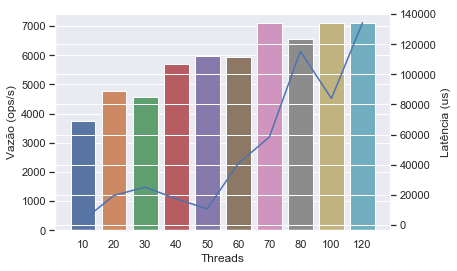

In [41]:
# Geração de gráfico

mean_df = pd.DataFrame(mean_data, columns = ['Threads', 'Throughput', 'Latency']) 
median_df = pd.DataFrame(median_data, columns = ['Threads', 'Throughput', 'Latency']) 
std_df = pd.DataFrame(std_data, columns = ['Threads', 'Throughput', 'Latency']) 
display(mean_df)
print(mean_df.to_latex(index=False, float_format="%.2f"))
display(median_df)
print(median_df.to_latex(index=False, float_format="%.2f"))
display(std_df)
print(std_df.to_latex(index=False, float_format="%.2f"))
ax = sns.barplot(x="Threads", y="Throughput", data=mean_df)
ax.set(xlabel='Threads', ylabel='Vazão (ops/s)')
ax2 = plt.twinx()
ax2.set(ylabel="Latência (us)")
fig = sns.lineplot(data=mean_df.Latency, ax=ax2)

In [42]:
# WORKLOAD C
mean_data = []
median_data = []
std_data = []
for i in [10,20,30,40,50,60,70,80,100,120]:
    df = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadc_couchbase_custom/results-' + str(i) + '.csv', sep = ';', header=None)
    df_val1 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadc_couchbase_custom-validation/results-' + str(i) + '.csv', sep = ';', header=None)
    df_val2 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadc_couchbase_custom-validation2/results-' + str(i) + '.csv', sep = ';', header=None)

    means = (df.groupby(3).mean() + df_val1.groupby(3).mean() + df_val2.groupby(3).mean()) / 3
    means = means.drop(index='CLEANUP')
    if (i == 70):
        means = means.drop(index='SCAN-FAILED')
    throughput_weighted_average = ([0.95, 0.05] * means[2].values).sum()
    latency_weighted_average = ([0.95, 0.05] * means[4].values).sum()
    mean_data.append([i, throughput_weighted_average, latency_weighted_average])
    medians = (df.groupby(3).median() + df_val1.groupby(3).median() + df_val2.groupby(3).median()) / 3
    medians = medians.drop(index='CLEANUP')
    if (i == 70):
        medians = medians.drop(index='SCAN-FAILED')
    throughput_weighted_average = ([0.95, 0.05] * medians[2].values).sum()
    latency_weighted_average = ([0.95, 0.05] * medians[4].values).sum()
    median_data.append([i, throughput_weighted_average, latency_weighted_average])
    
    stds = (df.groupby(3).std() + df_val1.groupby(3).std() + df_val2.groupby(3).std()) / 3
    stds = stds.drop(index='CLEANUP')
    if (i == 70):
        stds = stds.drop(index='SCAN-FAILED')
    throughput_weighted_average = ([0.95, 0.05] * stds[2].values).sum()
    latency_weighted_average = ([0.95, 0.05] * stds[4].values).sum()
    std_data.append([i, throughput_weighted_average, latency_weighted_average])

,Threads,Throughput,Latency
0,10,493.429574,24091.631777
1,20,582.928228,39531.689993
2,30,609.079812,55795.874231
3,40,681.075560,79318.397047
4,50,683.500163,95435.365929
5,60,713.884932,112612.825216
6,70,676.027793,147564.303140
7,80,720.389288,145693.350774
8,100,725.280191,187263.558272
9,120,682.033426,219928.705039


\begin{tabular}{rrr}
\toprule
 Threads &  Throughput &   Latency \\
\midrule
      10 &      493.43 &  24091.63 \\
      20 &      582.93 &  39531.69 \\
      30 &      609.08 &  55795.87 \\
      40 &      681.08 &  79318.40 \\
      50 &      683.50 &  95435.37 \\
      60 &      713.88 & 112612.83 \\
      70 &      676.03 & 147564.30 \\
      80 &      720.39 & 145693.35 \\
     100 &      725.28 & 187263.56 \\
     120 &      682.03 & 219928.71 \\
\bottomrule
\end{tabular}



,Threads,Throughput,Latency
0,10,503.230750,19768.599000
1,20,588.345167,33632.485000
2,30,615.652833,48816.129000
3,40,687.519167,57937.434250
4,50,694.483333,71988.404333
5,60,740.649750,80842.533833
6,70,681.416333,101910.736417
7,80,741.966750,107534.006333
8,100,742.576667,132925.632583
9,120,689.774833,173842.836333


\begin{tabular}{rrr}
\toprule
 Threads &  Throughput &   Latency \\
\midrule
      10 &      503.23 &  19768.60 \\
      20 &      588.35 &  33632.48 \\
      30 &      615.65 &  48816.13 \\
      40 &      687.52 &  57937.43 \\
      50 &      694.48 &  71988.40 \\
      60 &      740.65 &  80842.53 \\
      70 &      681.42 & 101910.74 \\
      80 &      741.97 & 107534.01 \\
     100 &      742.58 & 132925.63 \\
     120 &      689.77 & 173842.84 \\
\bottomrule
\end{tabular}



,Threads,Throughput,Latency
0,10,101.107677,48510.594662
1,20,122.993650,56113.074862
2,30,126.879514,68692.191759
3,40,146.796752,181119.756237
4,50,150.810780,206817.192506
5,60,161.655830,238627.916780
6,70,160.539945,348191.373607
7,80,154.472038,296283.662598
8,100,164.741881,427806.679083
9,120,146.469099,390799.081210


\begin{tabular}{rrr}
\toprule
 Threads &  Throughput &   Latency \\
\midrule
      10 &      101.11 &  48510.59 \\
      20 &      122.99 &  56113.07 \\
      30 &      126.88 &  68692.19 \\
      40 &      146.80 & 181119.76 \\
      50 &      150.81 & 206817.19 \\
      60 &      161.66 & 238627.92 \\
      70 &      160.54 & 348191.37 \\
      80 &      154.47 & 296283.66 \\
     100 &      164.74 & 427806.68 \\
     120 &      146.47 & 390799.08 \\
\bottomrule
\end{tabular}



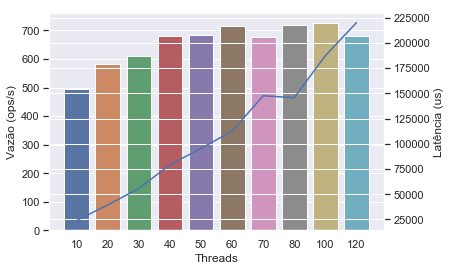

In [43]:
# Geração de gráfico

mean_df = pd.DataFrame(mean_data, columns = ['Threads', 'Throughput', 'Latency']) 
median_df = pd.DataFrame(median_data, columns = ['Threads', 'Throughput', 'Latency']) 
std_df = pd.DataFrame(std_data, columns = ['Threads', 'Throughput', 'Latency']) 
display(mean_df)
print(mean_df.to_latex(index=False, float_format="%.2f"))
display(median_df)
print(median_df.to_latex(index=False, float_format="%.2f"))
display(std_df)
print(std_df.to_latex(index=False, float_format="%.2f"))
ax = sns.barplot(x="Threads", y="Throughput", data=mean_df)
ax.set(xlabel='Threads', ylabel='Vazão (ops/s)')
ax2 = plt.twinx()
ax2.set(ylabel="Latência (us)")
fig = sns.lineplot(data=mean_df.Latency, ax=ax2)

In [50]:
# WORKLOAD D
mean_data = []
median_data = []
std_data = []
for i in [10,20,30,40,50,60,70,80,100,120]:
    df = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadd_couchbase_custom/result-' + str(i) + '.csv', sep = ';', header=None)
    df_val1 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadd_couchbase_custom-validation/result-' + str(i) + '.csv', sep = ';', header=None)
    df_val2 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadd_couchbase_custom-validation2/result-' + str(i) + '.csv', sep = ';', header=None)

    means = (df.groupby(3).mean() + df_val1.groupby(3).mean() + df_val2.groupby(3).mean()) / 3
    means = means.drop(index='CLEANUP')
    throughput_weighted_average = ([0.95, 0.05] * means[2].values).sum()
    latency_weighted_average = ([0.95, 0.05] * means[4].values).sum()
    mean_data.append([i, throughput_weighted_average, latency_weighted_average])
    medians = (df.groupby(3).median() + df_val1.groupby(3).median() + df_val2.groupby(3).median()) / 3
    medians = medians.drop(index='CLEANUP')
    throughput_weighted_average = ([0.95, 0.05] * medians[2].values).sum()
    latency_weighted_average = ([0.95, 0.05] * medians[4].values).sum()
    median_data.append([i, throughput_weighted_average, latency_weighted_average])
    
    stds = (df.groupby(3).std() + df_val1.groupby(3).std() + df_val2.groupby(3).std()) / 3
    stds = stds.drop(index='CLEANUP')
    throughput_weighted_average = ([0.95, 0.05] * stds[2].values).sum()
    latency_weighted_average = ([0.95, 0.05] * stds[4].values).sum()
    std_data.append([i, throughput_weighted_average, latency_weighted_average])

,Threads,Throughput,Latency
0,10,3739.482272,3414.743851
1,20,4779.614258,5618.375919
2,30,5351.394811,28045.955034
3,40,5719.290553,13515.760753
4,50,5790.097230,11152.700084
5,60,6424.324963,53929.557402
6,70,6414.706076,18909.181631
7,80,6390.868863,107875.672575
8,100,6198.055895,75116.292615
9,120,6660.293413,96825.432341


\begin{tabular}{rrr}
\toprule
 Threads &  Throughput &   Latency \\
\midrule
      10 &     3739.48 &   3414.74 \\
      20 &     4779.61 &   5618.38 \\
      30 &     5351.39 &  28045.96 \\
      40 &     5719.29 &  13515.76 \\
      50 &     5790.10 &  11152.70 \\
      60 &     6424.32 &  53929.56 \\
      70 &     6414.71 &  18909.18 \\
      80 &     6390.87 & 107875.67 \\
     100 &     6198.06 &  75116.29 \\
     120 &     6660.29 &  96825.43 \\
\bottomrule
\end{tabular}



,Threads,Throughput,Latency
0,10,3793.836667,2953.992167
1,20,4784.166667,4486.781000
2,30,5874.303333,5466.107833
3,40,5829.349000,7095.385250
4,50,6041.395000,8699.414250
5,60,6613.500000,8891.836167
6,70,6868.114667,9994.830917
7,80,6865.129667,10820.561917
8,100,6788.693333,14461.160917
9,120,7002.631667,17069.395333


\begin{tabular}{rrr}
\toprule
 Threads &  Throughput &  Latency \\
\midrule
      10 &     3793.84 &  2953.99 \\
      20 &     4784.17 &  4486.78 \\
      30 &     5874.30 &  5466.11 \\
      40 &     5829.35 &  7095.39 \\
      50 &     6041.39 &  8699.41 \\
      60 &     6613.50 &  8891.84 \\
      70 &     6868.11 &  9994.83 \\
      80 &     6865.13 & 10820.56 \\
     100 &     6788.69 & 14461.16 \\
     120 &     7002.63 & 17069.40 \\
\bottomrule
\end{tabular}



,Threads,Throughput,Latency
0,10,1198.203113,1810.414761
1,20,1439.377843,5791.107084
2,30,1723.392885,99831.771181
3,40,1653.077482,28702.454694
4,50,1725.849221,11804.961033
5,60,2173.730830,178571.785057
6,70,2071.879768,35319.837454
7,80,2379.515442,379175.610971
8,100,2381.419053,234049.844457
9,120,2061.554756,302008.571709


\begin{tabular}{rrr}
\toprule
 Threads &  Throughput &   Latency \\
\midrule
      10 &     1198.20 &   1810.41 \\
      20 &     1439.38 &   5791.11 \\
      30 &     1723.39 &  99831.77 \\
      40 &     1653.08 &  28702.45 \\
      50 &     1725.85 &  11804.96 \\
      60 &     2173.73 & 178571.79 \\
      70 &     2071.88 &  35319.84 \\
      80 &     2379.52 & 379175.61 \\
     100 &     2381.42 & 234049.84 \\
     120 &     2061.55 & 302008.57 \\
\bottomrule
\end{tabular}



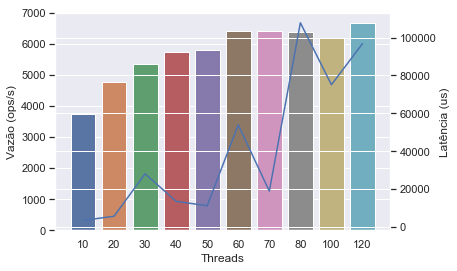

In [51]:
# Geração de gráfico

mean_df = pd.DataFrame(mean_data, columns = ['Threads', 'Throughput', 'Latency']) 
median_df = pd.DataFrame(median_data, columns = ['Threads', 'Throughput', 'Latency']) 
std_df = pd.DataFrame(std_data, columns = ['Threads', 'Throughput', 'Latency']) 
display(mean_df)
print(mean_df.to_latex(index=False, float_format="%.2f"))
display(median_df)
print(median_df.to_latex(index=False, float_format="%.2f"))
display(std_df)
print(std_df.to_latex(index=False, float_format="%.2f"))
ax = sns.barplot(x="Threads", y="Throughput", data=mean_df)
ax.set(xlabel='Threads', ylabel='Vazão (ops/s)')
ax2 = plt.twinx()
ax2.set(ylabel="Latência (us)")
fig = sns.lineplot(data=mean_df.Latency, ax=ax2)

In [55]:
# QUERY 1
mean_data = []
median_data = []
std_data = []
for i in [10,20,30,40,50,60,70,80,100,120]:
    #df = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadq1_couchbase_custom/results-' + str(i) + '.csv', sep = ';', header=None)
    df_val1 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadq1_couchbase_custom-validation/results-' + str(i) + '.csv', sep = ';', header=None)
    df_val2 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadq1_couchbase_custom-validation2/results-' + str(i) + '.csv', sep = ';', header=None)

    means = (df_val1.groupby(3).mean() + df_val2.groupby(3).mean()) / 2
    means = means.drop(index='CLEANUP')
    throughput_weighted_average = ([1, 0] * means[2].values).sum()
    latency_weighted_average = ([1, 0] * means[4].values).sum()
    mean_data.append([i, throughput_weighted_average, latency_weighted_average])
    medians = (df_val1.groupby(3).median() + df_val2.groupby(3).median()) / 2
    medians = medians.drop(index='CLEANUP')
    throughput_weighted_average = ([1, 0] * medians[2].values).sum()
    latency_weighted_average = ([1, 0] * medians[4].values).sum()
    median_data.append([i, throughput_weighted_average, latency_weighted_average])
    
    stds = (df_val1.groupby(3).std() + df_val2.groupby(3).std()) / 2
    stds = stds.drop(index='CLEANUP')
    throughput_weighted_average = ([1, 0] * stds[2].values).sum()
    latency_weighted_average = ([1, 0] * stds[4].values).sum()
    std_data.append([i, throughput_weighted_average, latency_weighted_average])

,Threads,Throughput,Latency
0,10,1080.918754,20156.627292
1,20,1345.724774,20783.861395
2,30,1529.451979,32218.555642
3,40,1618.074194,54329.296129
4,50,1619.085597,92318.944100
5,60,1684.493609,67365.768990
6,70,1690.594662,115130.673099
7,80,1733.322667,105316.179260
8,100,1730.014310,142017.278362
9,120,1717.793329,178022.312952


\begin{tabular}{rrr}
\toprule
 Threads &  Throughput &   Latency \\
\midrule
      10 &     1080.92 &  20156.63 \\
      20 &     1345.72 &  20783.86 \\
      30 &     1529.45 &  32218.56 \\
      40 &     1618.07 &  54329.30 \\
      50 &     1619.09 &  92318.94 \\
      60 &     1684.49 &  67365.77 \\
      70 &     1690.59 & 115130.67 \\
      80 &     1733.32 & 105316.18 \\
     100 &     1730.01 & 142017.28 \\
     120 &     1717.79 & 178022.31 \\
\bottomrule
\end{tabular}



,Threads,Throughput,Latency
0,10,1111.0000,8893.4500
1,20,1358.4350,14596.3800
2,30,1552.1925,19124.9750
3,40,1664.8350,23922.0950
4,50,1665.6650,30159.2100
5,60,1735.7650,34172.6850
6,70,1756.4350,39585.5725
7,80,1783.5000,44381.6600
8,100,1817.6525,54988.8100
9,120,1797.4100,65452.5500


\begin{tabular}{rrr}
\toprule
 Threads &  Throughput &  Latency \\
\midrule
      10 &     1111.00 &  8893.45 \\
      20 &     1358.43 & 14596.38 \\
      30 &     1552.19 & 19124.97 \\
      40 &     1664.84 & 23922.10 \\
      50 &     1665.66 & 30159.21 \\
      60 &     1735.76 & 34172.68 \\
      70 &     1756.43 & 39585.57 \\
      80 &     1783.50 & 44381.66 \\
     100 &     1817.65 & 54988.81 \\
     120 &     1797.41 & 65452.55 \\
\bottomrule
\end{tabular}



,Threads,Throughput,Latency
0,10,183.771110,115173.586722
1,20,254.595752,54027.977625
2,30,253.391671,95298.413788
3,40,309.324452,223364.378717
4,50,353.341372,391895.602073
5,60,340.296520,230568.308817
6,70,411.272683,442929.320582
7,80,353.581554,431227.306263
8,100,398.257115,570424.813608
9,120,441.917769,480628.181373


\begin{tabular}{rrr}
\toprule
 Threads &  Throughput &   Latency \\
\midrule
      10 &      183.77 & 115173.59 \\
      20 &      254.60 &  54027.98 \\
      30 &      253.39 &  95298.41 \\
      40 &      309.32 & 223364.38 \\
      50 &      353.34 & 391895.60 \\
      60 &      340.30 & 230568.31 \\
      70 &      411.27 & 442929.32 \\
      80 &      353.58 & 431227.31 \\
     100 &      398.26 & 570424.81 \\
     120 &      441.92 & 480628.18 \\
\bottomrule
\end{tabular}



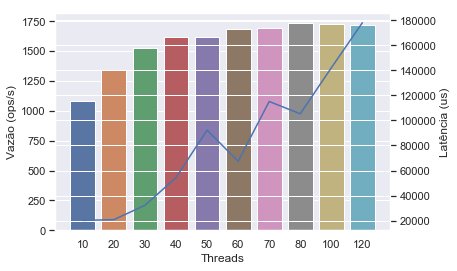

In [56]:
# Geração de gráfico

mean_df = pd.DataFrame(mean_data, columns = ['Threads', 'Throughput', 'Latency']) 
median_df = pd.DataFrame(median_data, columns = ['Threads', 'Throughput', 'Latency']) 
std_df = pd.DataFrame(std_data, columns = ['Threads', 'Throughput', 'Latency']) 
display(mean_df)
print(mean_df.to_latex(index=False, float_format="%.2f"))
display(median_df)
print(median_df.to_latex(index=False, float_format="%.2f"))
display(std_df)
print(std_df.to_latex(index=False, float_format="%.2f"))
ax = sns.barplot(x="Threads", y="Throughput", data=mean_df)
ax.set(xlabel='Threads', ylabel='Vazão (ops/s)')
ax2 = plt.twinx()
ax2.set(ylabel="Latência (us)")
fig = sns.lineplot(data=mean_df.Latency, ax=ax2)

In [57]:
# QUERY 2
mean_data = []
median_data = []
std_data = []
for i in [10,20,30,40,50,60]:
    #df = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadq1_couchbase_custom/results-' + str(i) + '.csv', sep = ';', header=None)
    df_val1 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadq2_couchbase_custom-validation/results-' + str(i) + '.csv', sep = ';', header=None)
    df_val2 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadq2_couchbase_custom-validation2/results-' + str(i) + '.csv', sep = ';', header=None)

    means = (df_val1.groupby(3).mean() + df_val2.groupby(3).mean()) / 2
    means = means.drop(index='CLEANUP')
    throughput_weighted_average = ([1, 0] * means[2].values).sum()
    latency_weighted_average = ([1, 0] * means[4].values).sum()
    mean_data.append([i, throughput_weighted_average, latency_weighted_average])
    medians = (df_val1.groupby(3).median() + df_val2.groupby(3).median()) / 2
    medians = medians.drop(index='CLEANUP')
    throughput_weighted_average = ([1, 0] * medians[2].values).sum()
    latency_weighted_average = ([1, 0] * medians[4].values).sum()
    median_data.append([i, throughput_weighted_average, latency_weighted_average])
    
    stds = (df_val1.groupby(3).std() + df_val2.groupby(3).std()) / 2
    stds = stds.drop(index='CLEANUP')
    throughput_weighted_average = ([1, 0] * stds[2].values).sum()
    latency_weighted_average = ([1, 0] * stds[4].values).sum()
    std_data.append([i, throughput_weighted_average, latency_weighted_average])

,Threads,Throughput,Latency
0,10,1236.713431,1.542339e+06
1,20,1808.276548,5.052065e+05
2,30,2517.909309,1.973651e+04
3,40,2651.879737,1.973390e+04
4,50,2435.664204,1.383156e+05
5,60,1483.738128,2.788046e+05


\begin{tabular}{rrr}
\toprule
 Threads &  Throughput &    Latency \\
\midrule
      10 &     1236.71 & 1542338.78 \\
      20 &     1808.28 &  505206.46 \\
      30 &     2517.91 &   19736.51 \\
      40 &     2651.88 &   19733.90 \\
      50 &     2435.66 &  138315.65 \\
      60 &     1483.74 &  278804.63 \\
\bottomrule
\end{tabular}



,Threads,Throughput,Latency
0,10,1205.535,16482.2625
1,20,1468.955,30470.3225
2,30,2654.000,10737.2100
3,40,2704.680,14642.5725
4,50,2612.020,19045.6500
5,60,1570.665,213944.8500


\begin{tabular}{rrr}
\toprule
 Threads &  Throughput &   Latency \\
\midrule
      10 &     1205.54 &  16482.26 \\
      20 &     1468.95 &  30470.32 \\
      30 &     2654.00 &  10737.21 \\
      40 &     2704.68 &  14642.57 \\
      50 &     2612.02 &  19045.65 \\
      60 &     1570.66 & 213944.85 \\
\bottomrule
\end{tabular}



,Threads,Throughput,Latency
0,10,574.419486,7.073319e+06
1,20,883.552025,1.256937e+06
2,30,637.861955,4.906274e+04
3,40,535.050977,3.258885e+04
4,50,904.275982,5.006632e+05
5,60,583.353917,3.727155e+05


\begin{tabular}{rrr}
\toprule
 Threads &  Throughput &    Latency \\
\midrule
      10 &      574.42 & 7073319.44 \\
      20 &      883.55 & 1256936.84 \\
      30 &      637.86 &   49062.74 \\
      40 &      535.05 &   32588.85 \\
      50 &      904.28 &  500663.15 \\
      60 &      583.35 &  372715.48 \\
\bottomrule
\end{tabular}



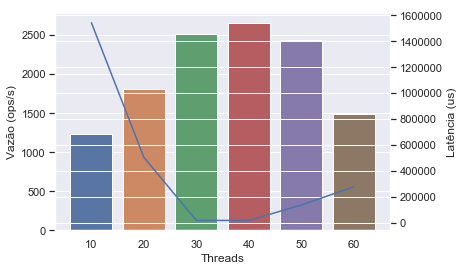

In [58]:
# Geração de gráfico

mean_df = pd.DataFrame(mean_data, columns = ['Threads', 'Throughput', 'Latency']) 
median_df = pd.DataFrame(median_data, columns = ['Threads', 'Throughput', 'Latency']) 
std_df = pd.DataFrame(std_data, columns = ['Threads', 'Throughput', 'Latency']) 
display(mean_df)
print(mean_df.to_latex(index=False, float_format="%.2f"))
display(median_df)
print(median_df.to_latex(index=False, float_format="%.2f"))
display(std_df)
print(std_df.to_latex(index=False, float_format="%.2f"))
ax = sns.barplot(x="Threads", y="Throughput", data=mean_df)
ax.set(xlabel='Threads', ylabel='Vazão (ops/s)')
ax2 = plt.twinx()
ax2.set(ylabel="Latência (us)")
fig = sns.lineplot(data=mean_df.Latency, ax=ax2)

In [62]:
df_val1 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadq2_couchbase_custom-validation/results-' + str(i) + '.csv', sep = ';', header=None)
df_val2 = pd.read_csv('../results/ycsb/4-nodes/6-clients/couchbase2/workloadq2_couchbase_custom-validation2/results-' + str(i) + '.csv', sep = ';', header=None)
means = (df_val1.groupby(3).mean() + df_val2.groupby(3).mean()) / 2
display(df_val1)

,0,1,2,3,4,5
0,7,61,61.00,QUERY_2,2287918.24,60
1,8,1750,1689.00,QUERY_2,71204.23,60
2,9,3660,1910.00,QUERY_2,31279.86,60
3,10,5476,1816.00,QUERY_2,32243.55,60
4,11,7189,1713.00,QUERY_2,35737.83,60
5,12,9896,2707.00,QUERY_2,21790.70,60
6,13,12646,2750.00,QUERY_2,22381.00,60
7,14,15471,2825.00,QUERY_2,21186.29,60
8,15,18302,2761.95,QUERY_2,20592.84,60
9,16,20511,2265.64,QUERY_2,27641.82,60
